<h1>UNAD - Universidad Nacional Abierta y a Distancia</h1>

<h3>Estudiante<br>
<b>Victor Javier Fortich Carabali</b><br>
Ingeniería de Sistemas</h3>

<p><h2><b>Regresión Logistica</b></h2>
<b>Datos de segmentación de clientes del centro comercial</b><br>
Este conjunto de datos se crea únicamente con el fin de aprender los conceptos de segmentación de clientes, también conocido como análisis de la cesta de la compra. Demostraré esto utilizando la técnica de aprendizaje automático no supervisado (algoritmo de agrupación en clústeres de KMeans) en la forma más simple.</p>

<br><b>Pasos de la Actividad</b><br>
<ol>
<li>Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.</li>
<li>Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.</li>
<li>Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.</li>
<li>Entrenar el modelo configurando los diferentes hiperparámetros.</li>
<li>Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.</li>
<li>Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.</li>
<li>Interpretar, analizar y documentar los resultados obtenidos</li>
<li>Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/</li>
</ol>
<p></p>

<h2> Desarrollo de la actividad</h2>

<h3><b>1. Realizaaar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.</b></h3>

In [1]:
#Librerias necesario para el desarrollo de la actividad

import pandas as pd                              # Sirve para el manejo y análisis de estructuras de datos
import numpy as np                               # Sirve para cálcular el numérico y el análisis de datos
import seaborn as sns                            # Sirve para la creación gráficos estadísticos
import matplotlib.pyplot as plt                  # Sirve para la creación de gráficos en dos dimensiones
import plotly.graph_objs as go                   # Creación de gráficos en tres dimensiones
import plotly.express as px                      # Creación de gráficos en tres dimensiones

from sklearn import metrics                      # Librerías - Modelos de ciencia de datos
from sklearn.cluster import KMeans               # librerías de para implementar modelo Kmeans
from sklearn.preprocessing import LabelEncoder   # librerías de para implementar modelo Kmeans

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Lectura de datos en Python y lo cargamos en la variable DatosRegresionLineal
DatosBD_CC = pd.read_csv('./BD Centro Comercial.csv')

In [3]:
DatosBD_CC.shape

(200, 5)

In [4]:
#Se realiza la lectura de los Datos para el análisis exploratorio
DatosBD_CC.head(20)

,ID_Cliente,Sexo,Edad,Ingresos_Anuales(k$),Puntuacion_Gastos(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
#Descripción del archivo
DatosBD_CC.describe()

,ID_Cliente,Edad,Ingresos_Anuales(k$),Puntuacion_Gastos(1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
#Descripción del archivo
DatosBD_CC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID_Cliente                200 non-null    int64 
 1   Sexo                      200 non-null    object
 2   Edad                      200 non-null    int64 
 3   Ingresos_Anuales(k$)      200 non-null    int64 
 4   Puntuacion_Gastos(1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos - Puntuacion')

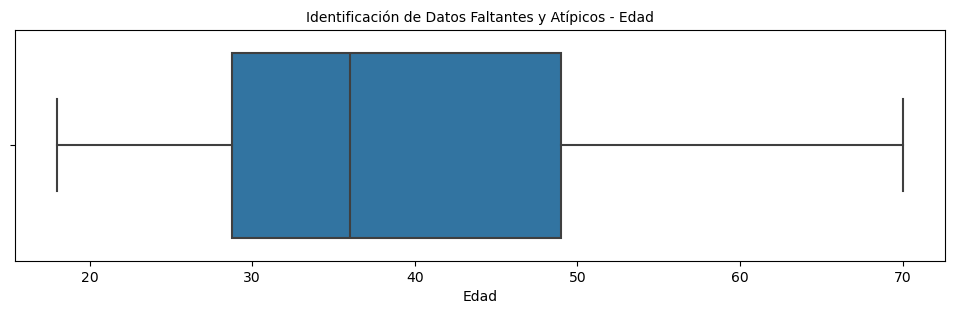

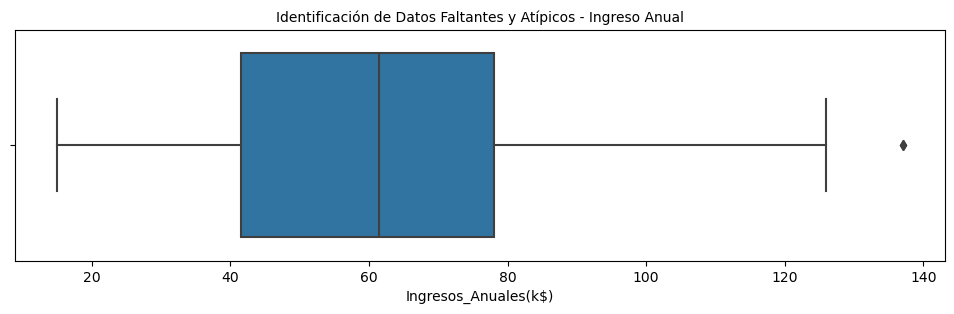

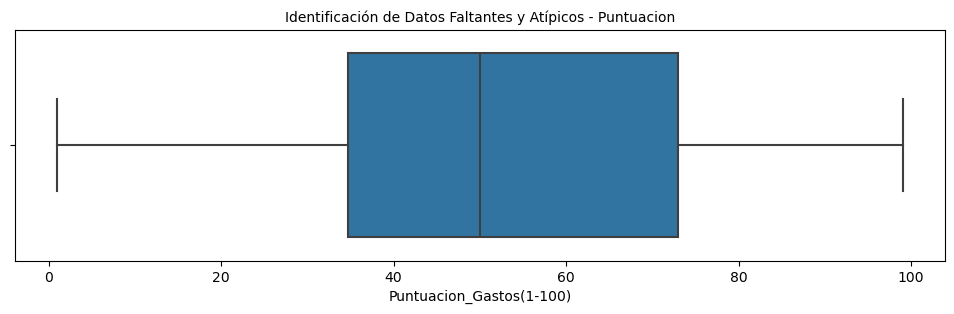

In [7]:
#Identificación de los Datos faltantes y los atípicos

plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosBD_CC['Edad'])
plt.title('Identificación de Datos Faltantes y Atípicos - Edad', fontsize=10 )

plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosBD_CC['Ingresos_Anuales(k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos - Ingreso Anual', fontsize=10 )

plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosBD_CC['Puntuacion_Gastos(1-100)'])
plt.title('Identificación de Datos Faltantes y Atípicos - Puntuacion', fontsize=10 )

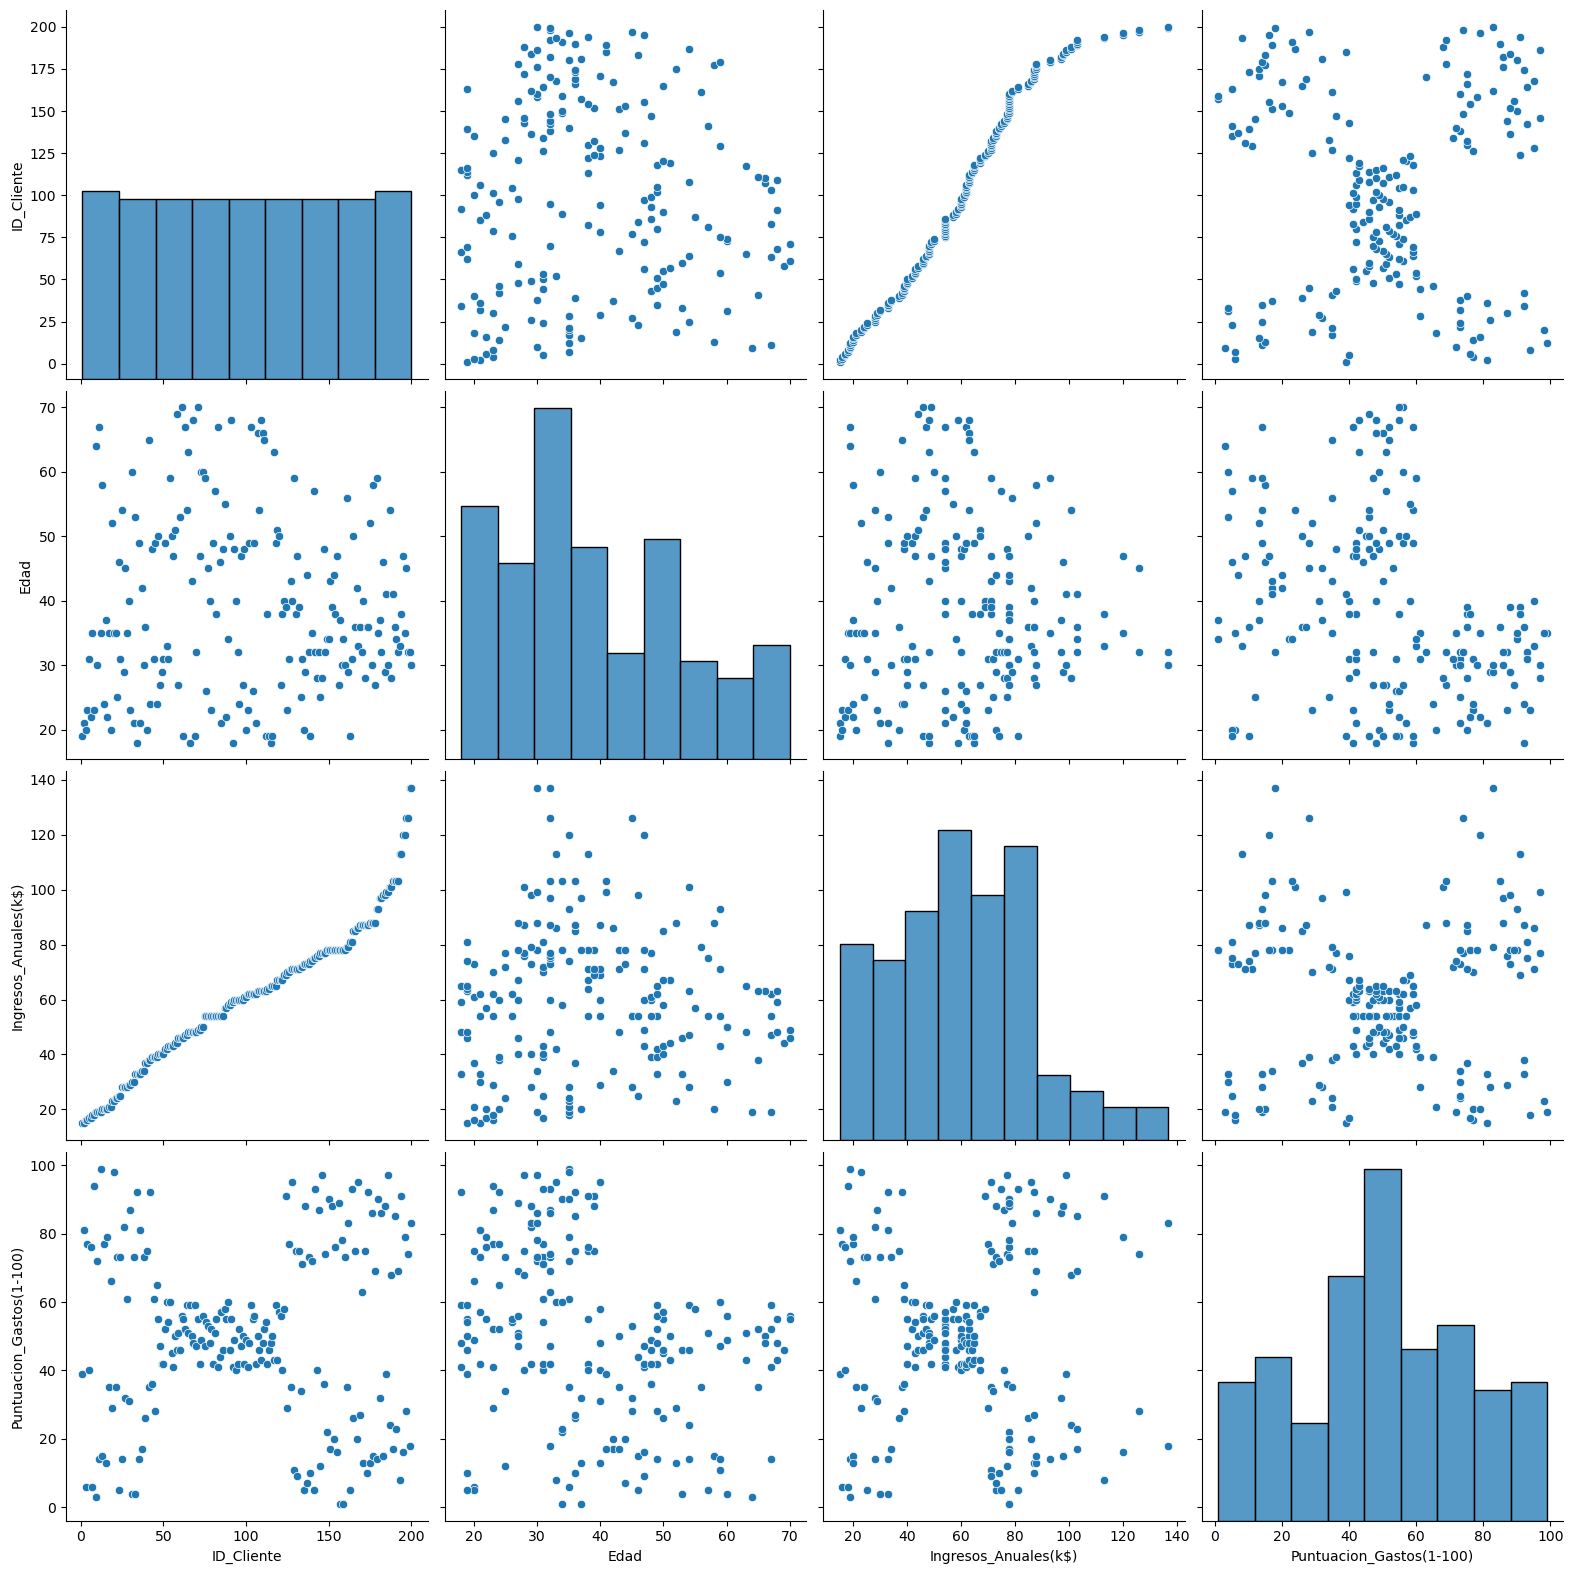

In [8]:
sns.pairplot(DatosBD_CC.dropna(), size=4,kind='scatter')

<h3><b>2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.</b></h3>

In [9]:
#procesar datos limpiandolos, tratando valores y Revisión de datos faltantes
print("Cantidad de Registros con cero en ID_Cliente:               ",DatosBD_CC['ID_Cliente'].isin([0]).sum())
print("Cantidad de Registros con cero en Sexo:                     ",DatosBD_CC['Sexo'].isin([0]).sum())
print("Cantidad de Registros con cero en Edad:                     ",DatosBD_CC['Edad'].isin([0]).sum())
print("Cantidad de Registros con cero en Ingresos_Anuales(k$):     ",DatosBD_CC['Ingresos_Anuales(k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en Puntuacion_Gastos(1-100): ",DatosBD_CC['Puntuacion_Gastos(1-100)'].isin([0]).sum())

Cantidad de Registros con cero en ID_Cliente:                0
Cantidad de Registros con cero en Sexo:                      0
Cantidad de Registros con cero en Edad:                      0
Cantidad de Registros con cero en Ingresos_Anuales(k$):      0
Cantidad de Registros con cero en Puntuacion_Gastos(1-100):  0


In [10]:
#procesar datos limpiandolos, tratando valores y Revisión de datos faltantes
print("Cantidad de Registros con cero en ID_Cliente:               ",DatosBD_CC['ID_Cliente'].isnull().sum())
print("Cantidad de Registros con cero en Sexo:                     ",DatosBD_CC['Sexo'].isnull().sum())
print("Cantidad de Registros con cero en Edad:                     ",DatosBD_CC['Edad'].isnull().sum())
print("Cantidad de Registros con cero en Ingresos_Anuales(k$):     ",DatosBD_CC['Ingresos_Anuales(k$)'].isnull().sum())
print("Cantidad de Registros con cero en Puntuacion_Gastos(1-100): ",DatosBD_CC['Puntuacion_Gastos(1-100)'].isnull().sum())

Cantidad de Registros con cero en ID_Cliente:                0
Cantidad de Registros con cero en Sexo:                      0
Cantidad de Registros con cero en Edad:                      0
Cantidad de Registros con cero en Ingresos_Anuales(k$):      0
Cantidad de Registros con cero en Puntuacion_Gastos(1-100):  0


In [11]:
DatosBD_CC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID_Cliente                200 non-null    int64 
 1   Sexo                      200 non-null    object
 2   Edad                      200 non-null    int64 
 3   Ingresos_Anuales(k$)      200 non-null    int64 
 4   Puntuacion_Gastos(1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<h3><b>3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.</b></h3>

<b>Características de interes para el agrupamiento:</b>:
<ol>
<li>Ingresos_Anuales(k$).</li>
<li>Puntuacion_Gastos(1-100).</li>
</ol>

In [12]:
# Filtrar columnas del modelo 

DatosBD_CC = DatosBD_CC[["Edad","Ingresos_Anuales(k$)","Puntuacion_Gastos(1-100)"]]

In [13]:
# Impresion de los primeros elementos en la dataset
DatosBD_CC.head(20)

,Edad,Ingresos_Anuales(k$),Puntuacion_Gastos(1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


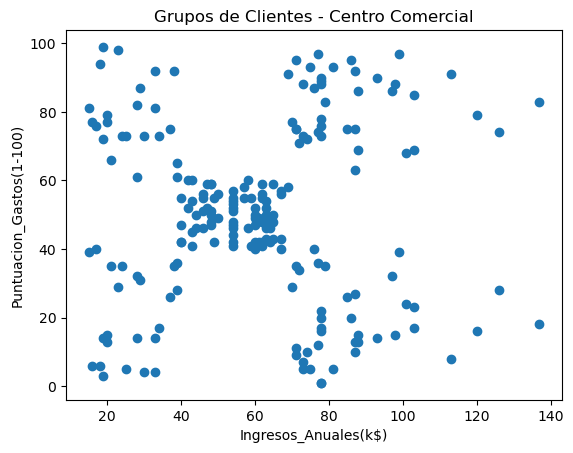

In [14]:
# Grafica antes del agrupamiento

plt.scatter(DatosBD_CC['Ingresos_Anuales(k$)'], DatosBD_CC['Puntuacion_Gastos(1-100)'])
plt.xlabel('Ingresos_Anuales(k$)')
plt.ylabel('Puntuacion_Gastos(1-100)')
plt.title('Grupos de Clientes - Centro Comercial')
plt.show()

<h3><b>4. Entrenar el modelo configurando los diferentes hiperparámetros.</b></h3>

<h3><b>4.1 K-Means.</b></h3>

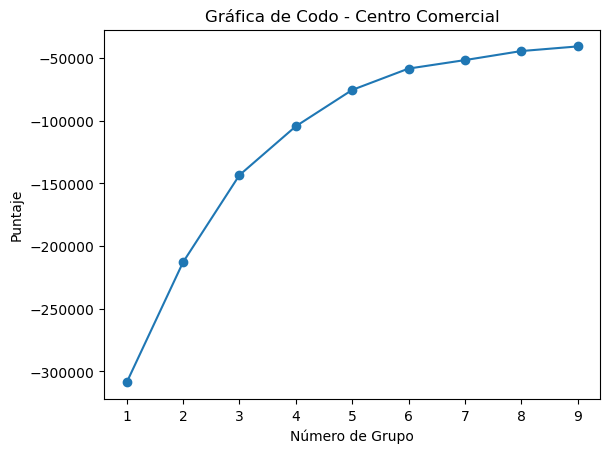

In [15]:
#Se realiza gráfica de codo para identificar valor de K

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(DatosBD_CC).score(DatosBD_CC) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Grupo')
plt.ylabel('Puntaje')
plt.title('Gráfica de Codo - Centro Comercial')
plt.show()

In [16]:
# Generación del modelo de Agrupamiento del modelo con K=5 (Es decir haremos 5 grupos de agrupamiento) 

Modelo = KMeans(n_clusters=6, random_state=0)
Modelo.fit(DatosBD_CC)
 

KMeans(n_clusters=6, random_state=0)

In [17]:
#Se agrega la columna Grupo a la BD para identificar el numero de grupo del agrupamiento

Modelo.labels_
DatosBD_CC["Grupo"] = Modelo.labels_ 
print (DatosBD_CC)

     Edad  Ingresos_Anuales(k$)  Puntuacion_Gastos(1-100)  Grupo
0      19                    15                        39      5
1      21                    15                        81      4
2      20                    16                         6      5
3      23                    16                        77      4
4      31                    17                        40      5
..    ...                   ...                       ...    ...
195    35                   120                        79      3
196    45                   126                        28      2
197    32                   126                        74      3
198    32                   137                        18      2
199    30                   137                        83      3

[200 rows x 4 columns]


<h3><b>4.2 Hierarchical Clustering.</b></h3>

In [18]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

NameError: name 'X' is not defined

In [ ]:
hier_clustering = AgglomerativeClustering(n_clusters=7)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

In [ ]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

In [ ]:
f1 = X['Ingresos_Anuales(k$)'].values
f2 = X['Puntuacion_Gastos(1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos Etiquetados')
plt.xlabel('Ingresos_Anuales(k$)')
plt.ylabel('Puntuacion_Gastos(1-100)')
plt.show()

In [ ]:
def plot_dendrogram(model, **kwargs):
    '''
    This function extracts the information from an AgglomerativeClustering model
    and plots its dendrogram with the dendrogram function from scipy.cluster.hierarchy
    '''
    from scipy.cluster.hierarchy import dendrogram
    import numpy as np    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    distances = np.arange(model.children_.shape[0])
    linkage_matrix = np.column_stack([model.children_, distances, counts]).astype(float)
    # Plot
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Dendrograma')
    plt.xlabel('Sample index')
    plt.ylabel('Euclidean distance')
    plt.show()

In [ ]:
plot_dendrogram(hier_clustering, color_threshold=0)

<h3><b>5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.</b></h3>

<h3><b>5.1 K-Means.</b></h3>

In [ ]:
# Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

# Preparación de la metrica de la columna Grupo
Observaciones = len(DatosBD_CC)
X = DatosBD_CC.drop('Grupo', axis=1)
clusters = DatosBD_CC['Grupo']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

<h3><b>5.2 Hierarchical Clustering.</b></h3>

In [ ]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [ ]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))

In [ ]:
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
# Compute the distances
X_dist = pdist(X)
# Compute the linkage matrix
Z = linkage(X, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

<h3><b>6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.</b></h3>

In [ ]:
#Grafico de información

plt.scatter(DatosBD_CC['Ingresos_Anuales(k$)'], DatosBD_CC['Puntuacion_Gastos(1-100)'], c=DatosBD_CC['Grupo'], cmap='viridis')
plt.xlabel('Ingresos_Anuales(k$)')
plt.ylabel('Puntuacion_Gastos(1-100)')
plt.title('Grupos de Clientes - Centro Comercial')
plt.show()

In [ ]:
# Crear un modelo 3D de los datos agrupados

Grafica_3D = px.scatter_3d(DatosBD_CC, x='Ingresos_Anuales(k$)', y='Puntuacion_Gastos(1-100)', z='Edad', color='Grupo', symbol='Grupo', symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle'}, opacity=0.7, width=900, height=850, title=f'Modelo de K-Means con un k={5}', labels={'label': 'Cluster'}, color_discrete_map={})
Grafica_3D.update_layout(showlegend=False) 

<h3><b>7. Interpretar, analizar y documentar los resultados obtenidos.</b></h3>

<b>Del desempeño del modelo se puede describir</b>:

<b>k-Means</b>
<ol>    
<li>Coeficiente de Silhouette: La puntuación de Silhouette es de aproximadamente 0.45 - (0.4523443947724053), aunque no se acerca a 1, todavía indica una buena cantidad de separación entre los grupos. Sugiere que los grupos son algo distintos, pero puede haber ligeras superposiciones entre ellos. En general, una puntuación más cercana a 1 sería ideal, ya que alcanzo casi su mitad.</li>
    
<li>Índice de Calinski-Harabasz: La puntuación de Calinski Harabasz es de 167 - (166.7204931788687), que es aceptablemente alta, lo que indica que los clústeres están bien definidos. Una puntuación más alta en esta métrica generalmente indica mejores definiciones de clúster, lo que implica que nuestra agrupación en clústeres ha logrado encontrar una estructura sustancial en los datos.</li>
    
<li>Indice Davies Bouldin: La puntuación de Davies Bouldin de 0,75 - (0.7469740072755283 ) es una puntuación razonable, lo que indica un nivel moderado de similitud entre cada grupo y el más similar. Una puntuación más baja es generalmente mejor, ya que indica menos similitud entre los clústeres y, por lo tanto, nuestra puntuación aquí sugiere una separación decente entre los grupos.</li>
</ol>

<b>Hierarchical Clustering</b>
<ol>    
<li>Coeficiente de Silhouette: La puntuación de Silhouette es de aproximadamente 0.43 - (0.4262301125101286), aunque no se acerca a 1, todavía indica una buena cantidad de separación entre los grupos. Sugiere que los grupos son algo distintos, pero puede haber ligeras superposiciones entre ellos. En general, una puntuación más cercana a 1 sería ideal, ya que alcanzo casi su mitad.</li>
    
<li>Índice de Calinski-Harabasz: La puntuación de Calinski Harabasz es de 153 - (152.93577235754373), que es aceptablemente alta, lo que indica que los clústeres están bien definidos. Una puntuación más alta en esta métrica generalmente indica mejores definiciones de clúster, lo que implica que nuestra agrupación en clústeres ha logrado encontrar una estructura sustancial en los datos.</li>
    
<li>Indice Davies Bouldin: La puntuación de Davies Bouldin de 0,85 - (0.8517013518157939) es una puntuación razonable, lo que indica un nivel moderado de similitud entre cada grupo y el más similar. Una puntuación más baja es generalmente mejor, ya que indica menos similitud entre los clústeres y, por lo tanto, nuestra puntuación aquí sugiere una separación decente entre los grupos.</li>
</ol>